In [13]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\David
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [15]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [16]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]



Total articles about Bitcoin: 8386


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener',
 'description': "It's all about clean energy, it seems.\xa0\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoins and that it will start accepting Bitcoin for purchases, an…",
 'url': 'https://mashable.com/article/tesla-bitcoin-purchases-green/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F14%252Fcc%252Faf6b974e89a64972a334f8675f5dc80a.36e5a.jpg%252F1200x630.jpg?signature=XiWTfhyod6_Xl2i4nyhER_1xCXQ=',
 'publishedAt': '2021-06-14T07:15:49Z',
 'content': "It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]"}

In [17]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 2254


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [35]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
           "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-06-29T20:21:00Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831
1,2021-06-29T20:21:00Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-06-29T20:21:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.000,0.893
3,2021-06-29T20:21:00Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
4,2021-06-29T20:21:00Z,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957


In [30]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
           "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-06-12,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000
1,2021-06-12,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
2,2021-06-12,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
3,2021-06-12,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806
4,2021-06-12,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850


In [36]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.008005,0.049400,0.04010,0.910450
std,0.357844,0.056995,0.05377,0.077973
min,-0.612400,0.000000,0.00000,0.705000
25%,-0.300350,0.000000,0.00000,0.853000
50%,0.000000,0.021500,0.00000,0.923000
75%,0.202300,0.105500,0.07350,0.967750
max,0.690800,0.169000,0.18400,1.000000


In [37]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.075045,0.040500,0.022750,0.936750
std,0.350432,0.058708,0.032751,0.055265
min,-0.381800,0.000000,0.000000,0.806000
25%,-0.273200,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,0.937000
75%,0.361200,0.074750,0.060000,1.000000
max,0.771700,0.194000,0.080000,1.000000


### Questions
Q: Which coin had the highest mean positive score?

A: Bitcoin.

Q: Which coin had the highest compound score?

A: Ethereum 

Q. Which coin had the highest positive score?

A: Ethereum.

### Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

1.Lowercase each word

2.Remove Punctuation

3.Remove Stopwords



In [39]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
lemmatizer = WordNetLemmatizer()

In [41]:
# Complete the tokenizer function- stopwords, punctuations, lower-case
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [42]:
# Create a new tokens column for bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,tokens
0,2021-06-29T20:21:00Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.000,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
1,2021-06-29T20:21:00Z,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-06-29T20:21:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.000,0.893,"[several, crypto, fan, descended, miami, flori..."
3,2021-06-29T20:21:00Z,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
4,2021-06-29T20:21:00Z,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.1280,0.043,0.000,0.957,"[san, salvador, june, reuters, el, salvador, r..."


In [43]:
# Create a new tokens column for ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,tokens
0,2021-06-12,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-12,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-06-12,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
3,2021-06-12,"Ether holders have ""staked"" more than $13 bill...",0.7717,0.194,0.000,0.806,"[ether, holder, staked, billion, worth, crypto..."
4,2021-06-12,Ether is the cryptocurrency of the ethereum ne...,0.6249,0.150,0.000,0.850,"[ether, cryptocurrency, ethereum, networkphoto..."


### NGrams and Frequency Analysis¶

In this section you will look at the ngrams and word frequency for each coin.
1.Use NLTK to produce the n-grams for N = 2

2.List the top 10 words for each coin.



In [44]:
from collections import Counter
from nltk import ngrams

In [45]:
# Tokenized Bitcoin articles
Bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
Bitcoin_p

['clean',
 'energy',
 'seemselon',
 'musk',
 'tesla',
 'caused',
 'ripple',
 'cryptocurrency',
 'market',
 'past',
 'month',
 'first',
 'announcing',
 'tesla',
 'bought',
 'billion',
 'worth',
 'bitcoi',
 'charsfiled',
 'underthe',
 'supply',
 'chain',
 'attack',
 'ha',
 'reached',
 'thousand',
 'organizationsillustration',
 'alex',
 'castro',
 'vergethree',
 'day',
 'ransomware',
 'attacker',
 'started',
 'holiday',
 'weekend',
 'comprom',
 'charsseveral',
 'crypto',
 'fan',
 'descended',
 'miami',
 'florida',
 'last',
 'weekend',
 'largest',
 'bitcoin',
 'conference',
 'history',
 'saying',
 'theyve',
 'tested',
 'positive',
 'covid',
 'larry',
 'cermak',
 'research',
 'director',
 'charsimage',
 'copyrightgetty',
 'imagesthe',
 'gang',
 'behind',
 'colossal',
 'ransomware',
 'attack',
 'ha',
 'demanded',
 'paid',
 'bitcoin',
 'return',
 'universal',
 'decryptor',
 'say',
 'unlock',
 'file',
 'charssan',
 'salvador',
 'june',
 'reuters',
 'el',
 'salvador',
 'replace',
 'us',
 'dolla

In [46]:
# Tokenized Ethereum articles
Ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
Ethereum_p

['tldr',
 'cryptocurrency',
 'ethereum',
 'solidity',
 'blockchain',
 'developer',
 'bundle',
 'sale',
 'june',
 'saving',
 'list',
 'priceis',
 'everyone',
 'know',
 'investing',
 'cryptocurrency',
 'charsit',
 'wasnt',
 'long',
 'ago',
 'average',
 'person',
 'clue',
 'nft',
 'wa',
 'nowadays',
 'theyre',
 'making',
 'headline',
 'selling',
 'hundred',
 'thousand',
 'buck',
 'predictably',
 'folk',
 'learning',
 'nfts',
 'charsbitcoin',
 'ethereumyuriko',
 'nakaoether',
 'overtook',
 'bitcoin',
 'number',
 'active',
 'address',
 'network',
 'friday',
 'sign',
 'demand',
 'faltering',
 'world',
 'biggest',
 'cryptocurrency',
 'co',
 'charsether',
 'holder',
 'staked',
 'billion',
 'worth',
 'cryptocurrency',
 'ethereum',
 'network',
 'excitement',
 'build',
 'around',
 'overhaul',
 'system',
 'potential',
 'growth',
 'staki',
 'charsether',
 'cryptocurrency',
 'ethereum',
 'networkphotothekgetty',
 'imagesether',
 'holder',
 'staked',
 'billion',
 'worth',
 'cryptocurrency',
 'ethereu

In [50]:
# Generate the Bitcoin N-grams where N=2
N=2
Bigram_counts_Bit = Counter(ngrams(Bitcoin_p, N))
print(dict(Bigram_counts_Bit))

{('clean', 'energy'): 1, ('energy', 'seemselon'): 1, ('seemselon', 'musk'): 1, ('musk', 'tesla'): 1, ('tesla', 'caused'): 1, ('caused', 'ripple'): 1, ('ripple', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 1, ('market', 'past'): 1, ('past', 'month'): 1, ('month', 'first'): 1, ('first', 'announcing'): 1, ('announcing', 'tesla'): 1, ('tesla', 'bought'): 1, ('bought', 'billion'): 1, ('billion', 'worth'): 1, ('worth', 'bitcoi'): 1, ('bitcoi', 'charsfiled'): 1, ('charsfiled', 'underthe'): 1, ('underthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsillustration'): 1, ('organizationsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergethree'): 1, ('vergethree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 1, ('comprom', 'charssever

In [53]:
# Generate the Ethereum N-grams where N=2
N= 2
Bigram_counts_Eth = Counter(ngrams(Ethereum_p, N))
print(dict(Bigram_counts_Eth))

{('tldr', 'cryptocurrency'): 1, ('cryptocurrency', 'ethereum'): 5, ('ethereum', 'solidity'): 2, ('solidity', 'blockchain'): 2, ('blockchain', 'developer'): 2, ('developer', 'bundle'): 2, ('bundle', 'sale'): 1, ('sale', 'june'): 1, ('june', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceis'): 1, ('priceis', 'everyone'): 1, ('everyone', 'know'): 1, ('know', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', 'charsit'): 1, ('charsit', 'wasnt'): 1, ('wasnt', 'long'): 1, ('long', 'ago'): 1, ('ago', 'average'): 1, ('average', 'person'): 1, ('person', 'clue'): 1, ('clue', 'nft'): 1, ('nft', 'wa'): 1, ('wa', 'nowadays'): 1, ('nowadays', 'theyre'): 1, ('theyre', 'making'): 1, ('making', 'headline'): 1, ('headline', 'selling'): 1, ('selling', 'hundred'): 1, ('hundred', 'thousand'): 1, ('thousand', 'buck'): 1, ('buck', 'predictably'): 1, ('predictably', 'folk'): 1, ('folk', 'learning'): 1, ('learning', 'nfts'): 1, ('nfts', 'charsbitcoin'): 1, ('charsbitcoin', 'ethereumyu

### Side Mission to show most common works for each of the Bigrams

In [56]:
Bigram_counts_Bit.most_common(10)

[(('june', 'reuters'), 5),
 (('charsby', 'reuters'), 5),
 (('reuters', 'el'), 4),
 (('el', 'salvador'), 4),
 (('bitcoin', 'legal'), 4),
 (('legal', 'tender'), 4),
 (('reuters', 'bitcoin'), 4),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4),
 (('world', 'biggest'), 4)]

In [54]:
Bigram_counts_Eth.most_common(10)

[(('world', 'biggest'), 8),
 (('previous', 'closebitcoin'), 7),
 (('closebitcoin', 'world'), 7),
 (('biggest', 'bestknown'), 7),
 (('bestknown', 'cryptocurrency'), 7),
 (('cryptocurrency', 'ethereum'), 5),
 (('charsby', 'reuters'), 5),
 (('gmt', 'sunday'), 4),
 (('sunday', 'adding'), 4),
 (('adding', 'previous'), 4)]

### Using actual "token_count" to find most common word from each coin.

#### Will look up why there's a difference

In [55]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [58]:
# Get the top 10 words for Bitcoin
bitcoin_common= token_count(Bitcoin_p, 10)
bitcoin_common

[('bitcoin', 19),
 ('reuters', 15),
 ('june', 8),
 ('cryptocurrency', 7),
 ('salvador', 6),
 ('charsby', 5),
 ('monday', 5),
 ('el', 4),
 ('legal', 4),
 ('tender', 4)]

In [59]:
# Get the top 10 words for Ethereum
ethereum_common= token_count(Ethereum_p,10)
ethereum_common

[('cryptocurrency', 16),
 ('world', 10),
 ('reuters', 9),
 ('biggest', 8),
 ('bitcoin', 7),
 ('previous', 7),
 ('closebitcoin', 7),
 ('bestknown', 7),
 ('ethereum', 6),
 ('network', 6)]

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

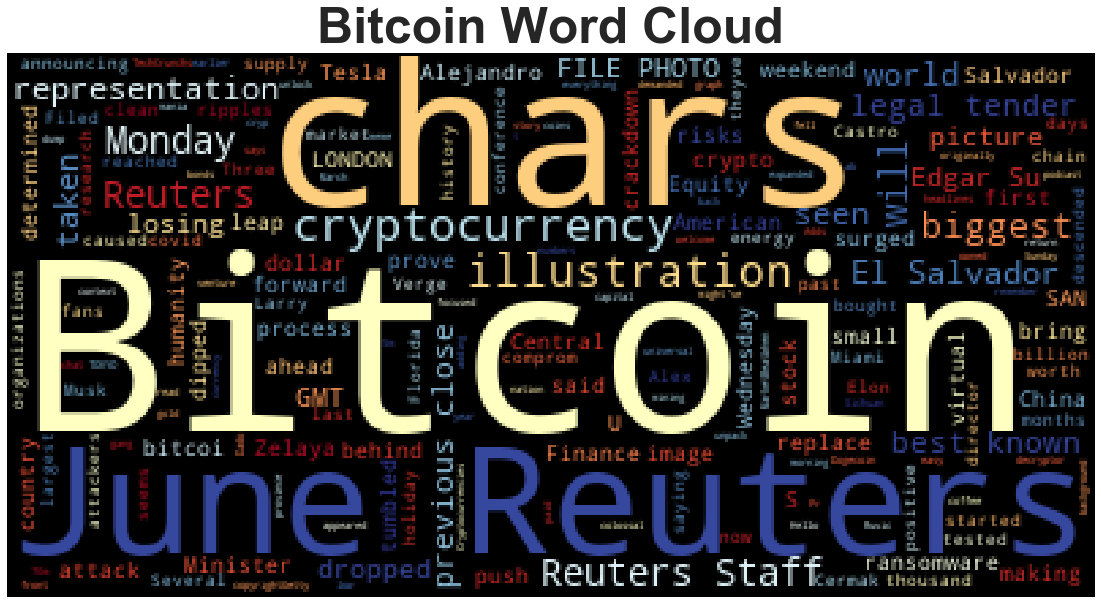

In [62]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(Bitcoin_df.Text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

## In experimenting the words shift around, El Salvador was in the bottom left and now in mid-right

### Also El Salvador is in the Cloud do to them deciding Bitcoin is legal tender.

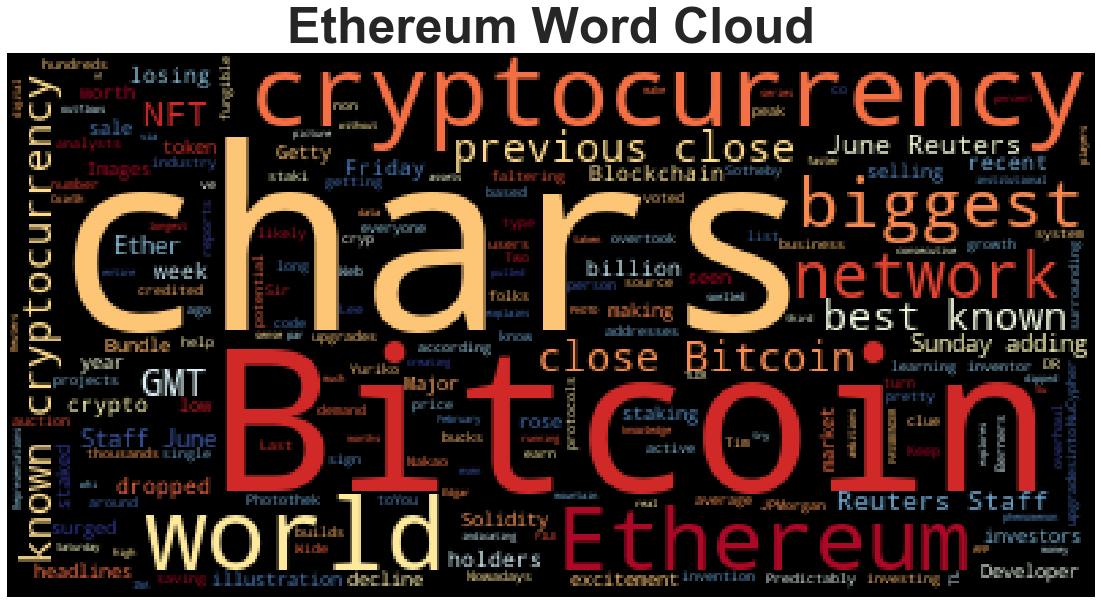

In [63]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(Ethereum_df.Text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

## Nothing too exciting in the articles for Ethereum, there is NFT which is the current sorta ponzi scheme thing going.

### Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.


In [64]:
import spacy
from spacy import displacy

In [65]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [72]:
# Concatenate all of the bitcoin text together
all_concat_Bitcoin = Bitcoin_df.Text.str.cat()
all_concat_Bitcoin

'It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyve tested positive for covid-19. \r\nLarry Cermak, research director … [+2389 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]SAN SALVADOR, June 16 (Reuters) - El Salvador will not replace the U.S. dollar with bitcoin as the legal tender, Finance Minist

In [73]:
# Run the NER processor on all of the text
Btc_doc = nlp(all_concat_Bitcoin)
Btc_doc
# Add a title to the document
Btc_doc.user_data["title"] = "Bitcoin NER"

In [74]:
# Render the visualization
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(Btc_doc,style='ent')

In [71]:
# List all Entities
for ent in Btc_doc.ents:
    print(ent.text, ent.label_)

Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
Alex Castro PERSON
Verge ORG
Three days DATE
the holiday weekend DATE
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
$70m MONEY
£50.5m MONEY
Bitcoin PERSON
SALVADOR ORG
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
the Central American LOC
Monday DATE
morning TIME
earlier this year DATE
Dogecoin GPE
Reuters ORG
June 13 DATE
Reuters ORG
9.8% PERCENT
39,035.47 MONEY
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
June 21 DATE
Reuters ORG
Monday DATE
China GPE
Sichuan GPE
Bitcoin PERSON
as low as $32,288 MONEY
first ORDINAL
Bitcoin PERSON
March 15, 2021 DATE
Dado Ruvic PERSON
June 30 DATE
Reuters ORG
Reute

### Ethereum NER

In [75]:
# Concatenate all of the ethereum text together
all_concat_Ethereum = Ethereum_df.Text.str.cat()
all_concat_Ethereum

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around the overhaul of the system and the potential growth of the staki… [+1851 chars]Ether is the cryptocurrency of the ethereum network.\r\nPhotothek/Getty Images\r\nEther holders have "staked" more than $13 billion wor

In [76]:
# Run the NER processor on all of the text
Eth_doc = nlp(all_concat_Ethereum)
Eth_doc
# Add a title to the document
Eth_doc.user_data["title"] = "Ethereum NER"

In [77]:
# Render the visualization
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(Eth_doc,style='ent')

In [78]:
# List all Entities
for ent in Eth_doc.ents:
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Ethereum ORG
Yuriko Nakao PERSON
Friday DATE
more than $13 billion MONEY
2.0 CARDINAL
Photothek/Getty Images PERSON
more than $13 billion MONEY
2.0 CARDINAL
$40 billion MONEY
2025 DATE
JPMorgan ORG
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Ethereum ORG
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
recent months DATE
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Saturday DATE
2,131.11 MONEY
Bitcoin PERSON
45.7% PERCENT
2021 DATE
6 MONEY
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
9.83 % PERCENT
22:05 CARDINAL
GMT ORG
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
40.7% PERCENT
year DATE
27 MONEY
Reuters ORG
June 25 DATE
Reuters ORG
8.51% PERCENT
31,699.83 MONEY
22:04 CARDINAL
GMT ORG
Friday DATE
2,937.27 MONEY
Bitcoin PERSON
Reuters ORG
June 13 DATE
Reuters ORG
9.83 % PERCENT
22:05 CARDINAL
GMT ORG
Sunday DATE
3,492.71 MONEY
Bitcoi